# Final Project
#### _Jake Postiglione_
#### _12-20-2021_

In [1]:
# Project Imports

import matplotlib.pyplot as plt
import numpy
import pandas
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from sklearn.preprocessing import Normalizer

%matplotlib inline

pandas.set_option('display.max_rows', None)

In [2]:
# Load all of our data
galaxy_targets = pandas.read_csv('Targets_GalaxyProperties.csv')
galaxy_targets.drop(axis='columns', columns=galaxy_targets.columns[0], inplace=True)

galaxy_features = pandas.read_csv('Features_Spectra.csv', header=None, delim_whitespace=True)

dust_targets = galaxy_targets[['Dust attenuation value']].values.flatten()
age_targets = galaxy_targets[['Age (Gyr)']].values.flatten()
mass_targets = galaxy_targets[['Log10(Mass/Mass_Sun)']].values.flatten()
tau_targets = galaxy_targets[['Tau (Gyr)']].values.flatten()


wavelengths = numpy.loadtxt('Wavelengths.txt', dtype=float)

Lets first visualize a few spectra of some *notable* galaxies.

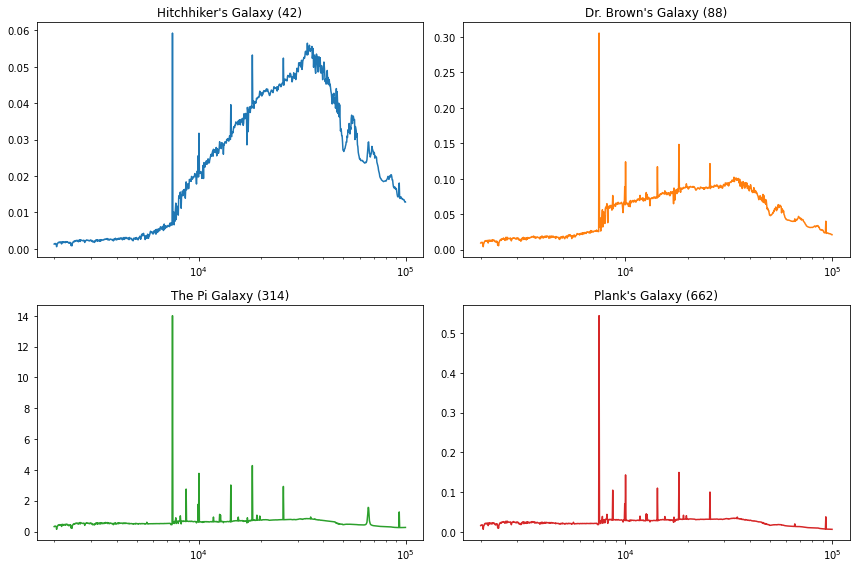

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].set_title("Hitchhiker's Galaxy (42)")
axs[0, 0].set_xscale('log')
axs[0, 0].plot(wavelengths, galaxy_features.loc[42, :].values, color='C0')

axs[0, 1].set_title("Dr. Brown's Galaxy (88)")
axs[0, 1].set_xscale('log')
axs[0, 1].plot(wavelengths, galaxy_features.loc[88, :].values, color='C1')

axs[1, 0].set_title("The Pi Galaxy (314)")
axs[1, 0].set_xscale('log')
axs[1, 0].plot(wavelengths, galaxy_features.loc[314, :].values, color='C2')

axs[1, 1].set_title("Plank's Galaxy (662)")
axs[1, 1].set_xscale('log')
axs[1, 1].plot(wavelengths, galaxy_features.loc[662, :].values, color='C3')

fig.tight_layout()
plt.show()

For this project I decided to use a Random Forest Regression model.

First I want to tackle creating a model for the stellar mass. Since I have a few cores to spare on my computer I set n_jobs to 16 which is able to process 10 n_splits with about the same speed as 1 n_job would process 5 n_splits.

In [4]:
random_forrest_regressor = RandomForestRegressor(n_estimators=100, random_state=21, n_jobs=-16)
random_forrest_cv = KFold(n_splits=10, shuffle=True, random_state=42)

### Stellar Mass

With both our random forrest model and cross validation object created, lets try and fit our features to the stellar mass target.

In [5]:
mass_scores = cross_validate(random_forrest_regressor, galaxy_features, mass_targets, cv=random_forrest_cv, return_train_score=True, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.5s finished


In [6]:
print(mass_scores, '\n')

print('Train Score: ', numpy.round(numpy.mean(mass_scores['train_score']), 3), numpy.round(numpy.std(mass_scores['train_score']), 3))
print('Test Score: ', numpy.round(numpy.mean(mass_scores['test_score']), 3), numpy.round(numpy.std(mass_scores['test_score']), 3))

{'fit_time': array([27.24399781, 27.31499743, 27.05449867, 27.08949876, 27.27599883,
       27.28899789, 27.31549859, 27.34099913, 27.22050118, 27.40400028]), 'score_time': array([0.01349974, 0.0115006 , 0.01200175, 0.01499987, 0.01149964,
       0.01400089, 0.01100039, 0.01400018, 0.01749802, 0.01899767]), 'test_score': array([0.95591228, 0.97909216, 0.98065841, 0.97233417, 0.97358046,
       0.97889819, 0.97594144, 0.96907564, 0.97396957, 0.96230766]), 'train_score': array([0.99640622, 0.99603881, 0.99600842, 0.99622656, 0.99621038,
       0.9961049 , 0.99615644, 0.99622459, 0.99586913, 0.99636695])} 

Train Score:  0.996 0.0
Test Score:  0.972 0.007


Train Score:  0.996 0.0

Test Score:  0.972 0.007

I'm fairly happy with these train and test scores, so lets go ahead and predict some values as well as graph it.

In [7]:
mass_predict = cross_val_predict(random_forrest_regressor, galaxy_features, mass_targets, cv=random_forrest_cv, n_jobs=8, verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:   24.8s remaining:   16.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   43.2s finished


[]

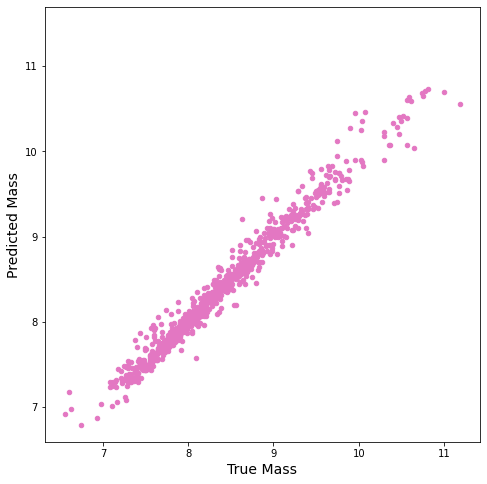

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(mass_targets, mass_predict, s=20, c='C6')
plt.xlabel('True Mass', fontsize=14)
plt.ylabel('Predicted Mass', fontsize=14)
plt.axis('square')
plt.plot()

This is pretty good, lets move on to creating a model for our dust target.

### Dust Attenuation

Similar to the stellar mass, I used cross validation and the random forrest regressor to build a model for our dust target.

In [9]:
dust_scores = cross_validate(random_forrest_regressor, galaxy_features, dust_targets, cv=random_forrest_cv, return_train_score=True, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   33.5s finished


In [10]:
print(dust_scores, '\n')

print('Train Score: ', numpy.round(numpy.mean(dust_scores['train_score']), 3), numpy.round(numpy.std(dust_scores['train_score']), 3))
print('Test Score: ', numpy.round(numpy.mean(dust_scores['test_score']), 3), numpy.round(numpy.std(dust_scores['test_score']), 3))

{'fit_time': array([31.12149954, 30.59349942, 31.52550292, 31.35499835, 30.63499999,
       31.25499916, 31.15750027, 31.17350149, 31.11699986, 31.38750029]), 'score_time': array([0.02050185, 0.01750016, 0.01049566, 0.01049972, 0.01749897,
       0.01100016, 0.01999974, 0.01799917, 0.01850152, 0.01249981]), 'test_score': array([0.8642942 , 0.87319834, 0.94321784, 0.81833162, 0.78720472,
       0.94045032, 0.93370674, 0.73123836, 0.97269763, 0.83821159]), 'train_score': array([0.98489356, 0.97631088, 0.98428021, 0.98159181, 0.98143295,
       0.98237542, 0.98160497, 0.98190521, 0.98090628, 0.98329878])} 

Train Score:  0.982 0.002
Test Score:  0.87 0.074


Train Score:  0.982 0.002

Test Score:  0.87 0.074

The mean for our test scores is a little low, but lets check out what our graph looks like.

In [11]:
dust_predict = cross_val_predict(random_forrest_regressor, galaxy_features, dust_targets, cv=random_forrest_cv, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   29.6s finished


[]

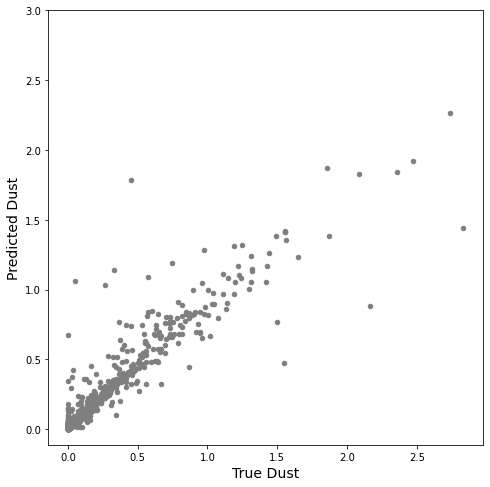

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(dust_targets, dust_predict, s=20, c='C7')
plt.xlabel('True Dust', fontsize=14)
plt.ylabel('Predicted Dust', fontsize=14)
plt.axis('square')
plt.plot()

We see a number of outliers with this model, but over all I think this is ok.

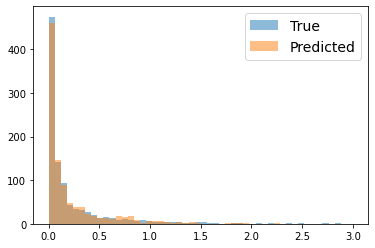

In [13]:
plt.hist(dust_targets, bins=50, density=False, alpha=0.5, range=(0, 3), label='True')
plt.hist(dust_predict, bins=50, density=False, alpha=0.5, range=(0, 3), color='C1', label='Predicted')
plt.legend(fontsize=14);

A histogram of the true and predicted values shows that we are slightly underfitting, but the model is generally pretty good.

### Age

In [14]:
age_scores = cross_validate(random_forrest_regressor, galaxy_features, age_targets, cv=random_forrest_cv, return_train_score=True, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   32.5s finished


In [15]:
print(age_scores, '\n')

print('Train Score: ', numpy.round(numpy.mean(age_scores['train_score']), 3), numpy.round(numpy.std(age_scores['train_score']), 3))
print('Test Score: ', numpy.round(numpy.mean(age_scores['test_score']), 3), numpy.round(numpy.std(age_scores['test_score']), 3))

{'fit_time': array([32.12999606, 32.44549751, 32.17700219, 31.64599752, 32.14802074,
       32.49699616, 32.26799679, 32.48349643, 31.61149621, 31.86449742]), 'score_time': array([0.01103139, 0.01099873, 0.01149821, 0.01749992, 0.01797509,
       0.01099968, 0.01049948, 0.01149964, 0.02199984, 0.01049995]), 'test_score': array([0.60846042, 0.52813276, 0.56619706, 0.43566152, 0.2375089 ,
       0.47221203, 0.45528715, 0.369485  , 0.64383949, 0.57240368]), 'train_score': array([0.92722557, 0.9295642 , 0.92831233, 0.92969139, 0.93700879,
       0.93343615, 0.92799391, 0.92946893, 0.92928352, 0.92721833])} 

Train Score:  0.93 0.003
Test Score:  0.489 0.116


Train Score:  0.93 0.003

Test Score:  0.489 0.116

Using the same setup as we did with Dust and Stellar Mass unfortunately gives us a pretty bad test score.

My original thought was that maybe there were some instances that were too noisy, or didn't contribute to the fitting of the model.

To test this theory, I dropped any instance with a standard deviation of less than 0.02 or greater than 5.

In [16]:
# gf_std = galaxy_features.std(axis=1)
#
# print(gf_std.sort_values())
#
# gf_std = gf_std[gf_std > 0.02].dropna()
# gf_std = gf_std[gf_std < 5].dropna()
#
# print(gf_std.sort_values())
#
# cut_galaxy_features = galaxy_features.loc[gf_std.index,:].reset_index(drop=True)
# cut_galaxy_targets = galaxy_targets.loc[gf_std.index,:].reset_index(drop=True)
#
# cut_age_targets = cut_galaxy_targets[['Age (Gyr)']].values.flatten()

It still gave a pretty bad score, so I instead turned to running a grid search; however, this not only took a super long time to run, it didn't produce any meaningful increase in our test values.

In [17]:
# parameters = {'max_depth':[21], 'min_samples_leaf':[2]}

# max-depth: 16

# 0.4997 {'min_samples_leaf': 2}
# 0.3994 {'min_samples_leaf': 10}

# Fitting 10 folds for each of 81 candidates, totalling 810 fits
# Best params, best score: 0.4999 {'max_depth': 21, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

# model = GridSearchCV(random_forrest_regressor, parameters, cv=random_forrest_cv, verbose=3, n_jobs=8, return_train_score=True)
#
# model.fit(galaxy_features, age_targets)
#
# print('Best params, best score:', "{:.4f}".format(model.best_score_),model.best_params_)


Lets create some charts and graphs to try and analyze what is going on.

In [18]:
age_predict = cross_val_predict(random_forrest_regressor, galaxy_features, age_targets, cv=random_forrest_cv, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   32.0s finished


[]

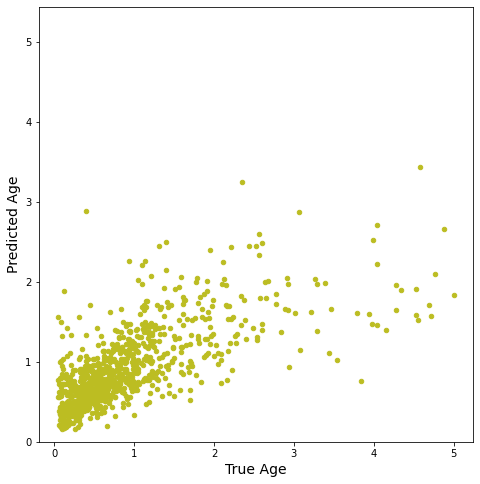

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(age_targets, age_predict, s=20, c='C8')
plt.xlabel('True Age', fontsize=14)
plt.ylabel('Predicted Age', fontsize=14)
plt.axis('square')
plt.plot()

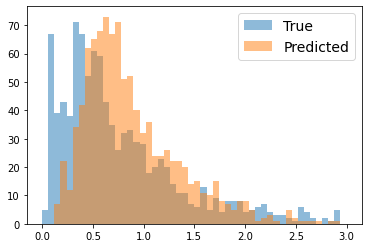

In [20]:
plt.hist(age_targets, bins=50, density=False, alpha=0.5, range=(0, 3), label='True')
plt.hist(age_predict, bins=50, density=False, alpha=0.5, range=(0, 3), color='C1', label='Predicted')
plt.legend(fontsize=14);

The model looks like its over fitting a bit and generally predicting ages that are higher than the true value.

I have a few theories as to why this is happening, the main one has to do with the model incorrectly identifying the higher magnitude of the wavelengths as a major factor for prediction age. However, if the age of a galaxy is correlated to the color and not the magnitude of the spectrum, normalizing the data should give us some good results.

Below is a function that prints all of the points of our data onto a scatter plot so we can view how all the data relates to itself.

In [21]:
# Basic function to plot of the data points from galaxy_features (1000 x 850 = 850,000)

def plot_all_spectra(features):
    fig_s = plt.figure(figsize=(8, 6))
    ax_s = fig_s.add_subplot()

    ax_s.set_title("All Spectra")
    ax_s.set_xscale('log')

    for index in features.index:
        ax_s.scatter(wavelengths, features.loc[index,:].values, alpha=0.5, s=8, lw=0)

    plt.show()

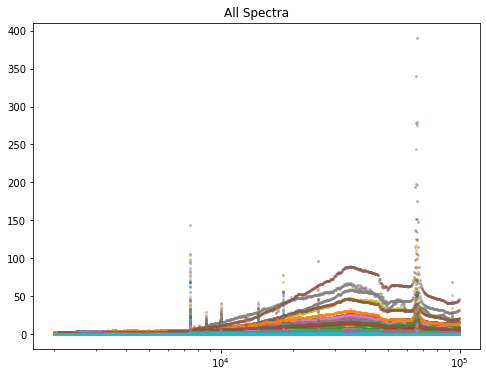

In [22]:
plot_all_spectra(galaxy_features) # Plotting un normalized data

In [23]:
normalizer = Normalizer()
normalized_galaxy_features = normalizer.fit_transform(galaxy_features)

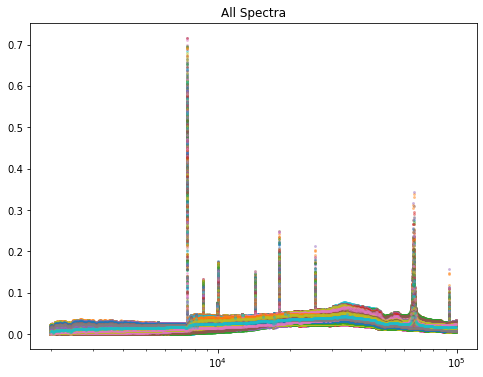

In [24]:
plot_all_spectra(DataFrame(normalized_galaxy_features)) # Plot normalized data

The main thing of note here is the scale of the y axis. With the un-normalized data, spectra were ranging from 0 to ~700. After normalization all the spectrum values are <= 1, which allows for values of galaxies with lower magnitude spectra to have a greater weight.

In [25]:
age_scores_scaled = cross_validate(random_forrest_regressor, normalized_galaxy_features, age_targets, cv=random_forrest_cv, return_train_score=True, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   30.0s finished


In [26]:
print(age_scores_scaled, '\n')

print('Train Score: ', numpy.round(numpy.mean(age_scores_scaled['train_score']), 3), numpy.round(numpy.std(age_scores_scaled['train_score']), 3))
print('Test Score: ', numpy.round(numpy.mean(age_scores_scaled['test_score']), 3), numpy.round(numpy.std(age_scores_scaled['test_score']), 3))

{'fit_time': array([29.32999849, 30.01952481, 29.79899859, 29.35799909, 29.13650012,
       29.63352656, 29.36099982, 29.61550164, 29.59549832, 29.53800178]), 'score_time': array([0.00700021, 0.00701594, 0.00902987, 0.01000142, 0.01100087,
       0.00700378, 0.01150084, 0.00749946, 0.01000357, 0.0110333 ]), 'test_score': array([0.89063723, 0.89854597, 0.84814329, 0.95678105, 0.73658775,
       0.93144038, 0.94718709, 0.95089473, 0.97238905, 0.92194638]), 'train_score': array([0.9871395 , 0.98669883, 0.98662668, 0.98431345, 0.9886966 ,
       0.98562694, 0.98536695, 0.98608716, 0.98660534, 0.98663741])} 

Train Score:  0.986 0.001
Test Score:  0.905 0.066


Train Score:  0.986 0.001

Test Score:  0.905 0.066

This is much better! Lets take a look at the graph to see how it compares to the previous one.

In [27]:
age_predict_scaled = cross_val_predict(random_forrest_regressor, normalized_galaxy_features, age_targets, cv=random_forrest_cv, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   29.2s finished


[]

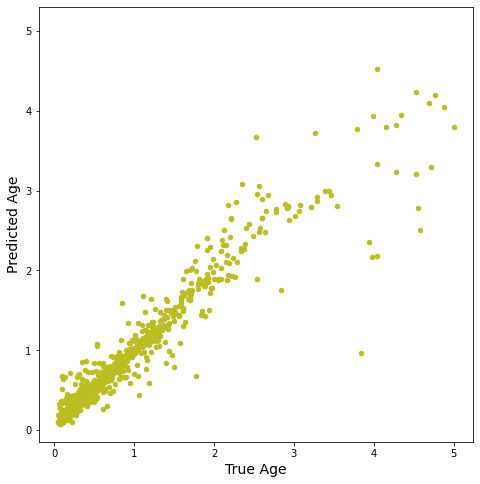

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(age_targets, age_predict_scaled, s=20, c='C8')
plt.xlabel('True Age', fontsize=14)
plt.ylabel('Predicted Age', fontsize=14)
plt.axis('square')
plt.plot()

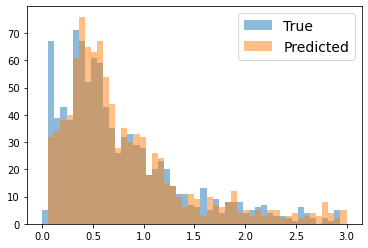

In [29]:
plt.hist(age_targets, bins=50, density=False, alpha=0.5, range=(0, 3), label='True')
plt.hist(age_predict_scaled, bins=50, density=False, alpha=0.5, range=(0, 3), color='C1', label='Predicted')
plt.legend(fontsize=14);

Our histrogram shows how much better our model is after normalization.

### Tau

In [30]:
tau_scores = cross_validate(random_forrest_regressor, galaxy_features, tau_targets, cv=random_forrest_cv, return_train_score=True, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   33.2s finished


In [31]:
print(tau_scores, '\n')

print('Train Score: ', numpy.round(numpy.mean(tau_scores['train_score']), 3), numpy.round(numpy.std(tau_scores['train_score']), 3))
print('Test Score: ', numpy.round(numpy.mean(tau_scores['test_score']), 3), numpy.round(numpy.std(tau_scores['test_score']), 3))

{'fit_time': array([32.60600114, 32.49950075, 32.57099986, 33.14752841, 31.78149891,
       32.86899924, 32.21699905, 32.29250002, 32.26900005, 32.12249947]), 'score_time': array([0.01199698, 0.01249814, 0.01700068, 0.01096964, 0.01750016,
       0.01049972, 0.01699948, 0.01599789, 0.01149964, 0.01700354]), 'test_score': array([-0.09778819,  0.10947904,  0.29359363,  0.00779848,  0.05598049,
       -0.13234191,  0.36052637,  0.17119036, -0.59132997,  0.22017684]), 'train_score': array([0.8795856 , 0.88132227, 0.8660057 , 0.87202359, 0.88265406,
       0.87521279, 0.86591813, 0.87201226, 0.88537355, 0.86800325])} 

Train Score:  0.875 0.007
Test Score:  0.04 0.259


Train Score:  0.875 0.007

Test Score:  0.04 0.259

Both the training and test scores are pretty low, lets take a look at the graphs to see whats going on.

In [32]:
tau_predict = cross_val_predict(random_forrest_regressor, galaxy_features, tau_targets, cv=random_forrest_cv, n_jobs=16, verbose=True)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:   31.4s finished


[]

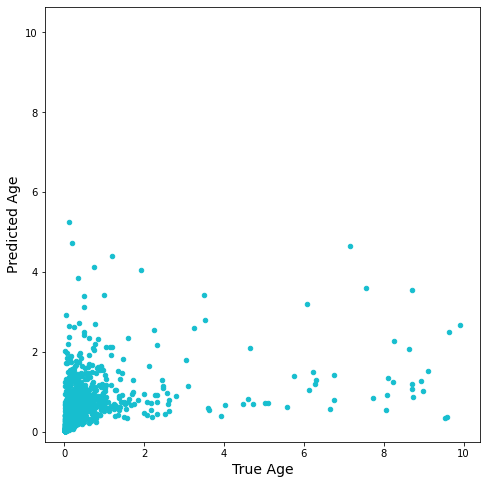

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(tau_targets, tau_predict, s=20, c='C9')
plt.xlabel('True Age', fontsize=14)
plt.ylabel('Predicted Age', fontsize=14)
plt.axis('square')
plt.plot()

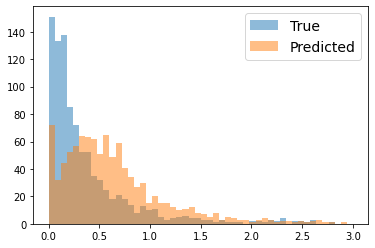

In [34]:
plt.hist(tau_targets, bins=50, density=False, alpha=0.5, range=(0, 3), label='True')
plt.hist(tau_predict, bins=50, density=False, alpha=0.5, range=(0, 3), color='C1', label='Predicted')
plt.legend(fontsize=14);

The histogram shows that we are severely underfitting.

After much trial and error, which isn't shown in this presentation, I was unable to improve this model.

Much like what I attempted with Age, I ran a grid search to see what hyperparameters of the model would improve our results.

The main parameter that improved the score at all was the number of estimators, or trees used in the random forrest model; however, this increased plateaued with a value of 350 and only increased the test score to 0.089.

I also tried several scaling functions to no avail.

## The End!